# Importing modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading data from CSV

In [2]:
data = pd.read_csv('roo_data.csv')
data.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [3]:
# All coloumn names
i = 0
for col in data.columns:
    i += 1
    print(f"{i}.", col)

1. Acedamic percentage in Operating Systems
2. percentage in Algorithms
3. Percentage in Programming Concepts
4. Percentage in Software Engineering
5. Percentage in Computer Networks
6. Percentage in Electronics Subjects
7. Percentage in Computer Architecture
8. Percentage in Mathematics
9. Percentage in Communication skills
10. Hours working per day
11. Logical quotient rating
12. hackathons
13. coding skills rating
14. public speaking points
15. can work long time before system?
16. self-learning capability?
17. Extra-courses did
18. certifications
19. workshops
20. talenttests taken?
21. olympiads
22. reading and writing skills
23. memory capability score
24. Interested subjects
25. interested career area 
26. Job/Higher Studies?
27. Type of company want to settle in?
28. Taken inputs from seniors or elders
29. interested in games
30. Interested Type of Books
31. Salary Range Expected
32. In a Realtionship?
33. Gentle or Tuff behaviour?
34. Management or Technical
35. Salary/work
36

In [4]:
# All rows present for Suggested Job Role
Xa = set(data['Suggested Job Role'])
cnt = 0
for i in Xa:
    cnt += 1
    print(f"{cnt}.", i)

1. CRM Business Analyst
2. Systems Analyst
3. Programmer Analyst
4. Systems Security Administrator
5. Project Manager
6. Database Manager
7. Software Quality Assurance (QA) / Testing
8. Technical Support
9. Database Administrator
10. E-Commerce Analyst
11. Software Developer
12. Web Developer
13. Network Security Administrator
14. Information Technology Auditor
15. Business Systems Analyst
16. Database Developer
17. Mobile Applications Developer
18. Information Technology Manager
19. Design & UX
20. Technical Engineer
21. Applications Developer
22. Business Intelligence Analyst
23. Software Systems Engineer
24. UX Designer
25. Information Security Analyst
26. Portal Administrator
27. CRM Technical Developer
28. Solutions Architect
29. Data Architect
30. Quality Assurance Associate
31. Software Engineer
32. Technical Services/Help Desk/Tech Support
33. Network Engineer
34. Network Security Engineer


# Pre-Processing Data

In [5]:
def club(group_roles, group_name):
    for role_name in group_roles:
        data.loc[data['Suggested Job Role'] == role_name, 'Suggested Job Role' ] = group_name

In [6]:
def club_admin_roles():
    group_roles = ['Network Security Administrator', 'Portal Administrator', 'Database Administrator', 'Systems Security Administrator']
    group_name = 'Administrator'
    club(group_roles, group_name)

In [7]:
def club_analyst_roles():
    group_roles = ['Business Intelligence Analyst', 'Business Systems Analyst', 'CRM Business Analyst', 'Information Security Analyst', 'Programmer Analyst', 'Systems Analyst', 'E-Commerce Analyst']
    group_name = 'Analyst'
    club(group_roles, group_name)

In [8]:
def club_architect_roles():
    group_roles = ['Data Architect', 'Solutions Architect']
    group_name = 'Data Science'
    club(group_roles, group_name)

In [9]:
def club_assosciate_roles():
    group_roles = ['UX Designer', 'Design & UX', 'Software Quality Assurance (QA) / Testing', 'Quality Assurance Associate', 'Information Technology Auditor']
    group_name = 'Assosciate Roles'
    club(group_roles, group_name)

In [10]:
def club_developer_roles():
    group_roles = ['Applications Developer', 'CRM Technical Developer', 'Database Developer', 'Mobile Applications Developer', 'Software Developer', 'Web Developer']
    group_name = 'Developer'
    club(group_roles, group_name)

In [11]:
def club_engineer_roles():
    group_roles = ['Network Engineer', 'Network Security Engineer', 'Technical Engineer']
    group_name = 'Engineer'
    club(group_roles, group_name)
    group_roles = ['Software Engineer', 'Software Systems Engineer']
    group_name = 'Software Engineer'
    club(group_roles, group_name)

In [12]:
def club_manager_roles():
    group_roles = ['Database Manager', 'Information Technology Manager', 'Project Manager']
    group_name = 'IT Manager'
    club(group_roles, group_name)

In [13]:
def club_technical_support_roles():
    group_roles = ['Technical Services/Help Desk/Tech Support', 'Technical Support']
    group_name = 'Technical Support'
    club(group_roles, group_name)

In [14]:
def create_groups():
    club_admin_roles()
    club_analyst_roles()
    club_architect_roles()
    club_assosciate_roles()
    club_developer_roles()
    club_engineer_roles()
    club_manager_roles()
    club_technical_support_roles()

create_groups()
# Data Science, AI Engineer, Software Engineer - Assignment 1

# Label Encoding

In [15]:
def encoding_label_strings():
    encoder_label = LabelEncoder()
    string_columns = ['can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'Salary Range Expected', 'In a Realtionship?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'Salary/work', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role', 'interested career area ']
    for col_name in string_columns:
        data[col_name] = encoder_label.fit_transform(data[col_name])

encoding_label_strings()

In [16]:
X = data.drop(['Suggested Job Role'], axis='columns')
Y = data['Suggested Job Role']

## 90:10

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3654, test_size=0.1)

In [18]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", max_iter=1000)
model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

In [19]:
classwise_accuracy1 = model.score(X_test, Y_test)
print(classwise_accuracy1)

0.1675


In [20]:
accuracy_90_10 = accuracy_score(Y_test, Y_prediction)
print(accuracy_90_10)

0.1675


### Confusion Matrix for 90:10

In [21]:
confusion_matrix_90_10 = multilabel_confusion_matrix(Y_test, Y_prediction, labels=np.unique(Y))
print(confusion_matrix_90_10)

[[[1426  293]
  [ 233   48]]

 [[1071  529]
  [ 250  150]]

 [[1460  268]
  [ 225   47]]

 [[1860   23]
  [ 116    1]]

 [[1370  298]
  [ 266   66]]

 [[1729   82]
  [ 173   16]]

 [[1721  104]
  [ 169    6]]

 [[1847   36]
  [ 117    0]]

 [[1851   32]
  [ 116    1]]]


## 80:20

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3654, test_size=0.2)

In [23]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", max_iter=1000)
model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

In [24]:
classwise_accuracy2 = model.score(X_test, Y_test)
print(classwise_accuracy2)

0.2


In [25]:
accuracy_80_20 = accuracy_score(Y_test, Y_prediction)
print(accuracy_80_20)

0.2


### Confusion Matrix for 80:20

In [26]:
confusion_matrix_80_20 = multilabel_confusion_matrix(Y_test, Y_prediction, labels=np.unique(Y))
print(confusion_matrix_80_20)

[[[3402   30]
  [ 563    5]]

 [[ 148 3039]
  [  44  769]]

 [[3390   46]
  [ 559    5]]

 [[3784    0]
  [ 216    0]]

 [[3269   48]
  [ 669   14]]

 [[3605   29]
  [ 361    5]]

 [[3646    8]
  [ 345    1]]

 [[3776    0]
  [ 223    1]]

 [[3780    0]
  [ 220    0]]]


## 70:30

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3654, test_size=0.3)

In [28]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", max_iter=1000)
model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

In [29]:
classwise_accuracy3 = model.score(X_test, Y_test)
print(classwise_accuracy3)

0.15266666666666667


In [30]:
accuracy_70_30 = accuracy_score(Y_test, Y_prediction)
print(accuracy_70_30)

0.15266666666666667


### Confusion Matrix for 70:30

In [31]:
confusion_matrix_70_30 = multilabel_confusion_matrix(Y_test, Y_prediction, labels=np.unique(Y))
print(confusion_matrix_70_30)

[[[4790  368]
  [ 772   70]]

 [[3389 1435]
  [ 829  347]]

 [[4422  705]
  [ 767  106]]

 [[5406  260]
  [ 317   17]]

 [[3326 1660]
  [ 686  328]]

 [[5137  302]
  [ 537   24]]

 [[5368   90]
  [ 534    8]]

 [[5602   62]
  [ 333    3]]

 [[5476  202]
  [ 309   13]]]


## 60:40

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3654, test_size=0.4)

In [33]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", max_iter=1000)
model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

In [34]:
classwise_accuracy4 = model.score(X_test, Y_test)
print(classwise_accuracy4)

0.15675


In [35]:
accuracy_60_40 = accuracy_score(Y_test, Y_prediction)
print(accuracy_60_40)

0.15675


### Confusion Matrix for 60:40

In [36]:
confusion_matrix_60_40 = multilabel_confusion_matrix(Y_test, Y_prediction, labels=np.unique(Y))
print(confusion_matrix_60_40)

[[[4396 2453]
  [ 744  407]]

 [[4106 2322]
  [1023  549]]

 [[5473 1355]
  [ 953  219]]

 [[7542    0]
  [ 458    0]]

 [[6294  371]
  [1279   56]]

 [[7067  212]
  [ 699   22]]

 [[7269   12]
  [ 719    0]]

 [[7547   20]
  [ 432    1]]

 [[7560    1]
  [ 439    0]]]


# Visualising Test Size vs Class-Wise Accuracy

C:\Users\MOHD SUFYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


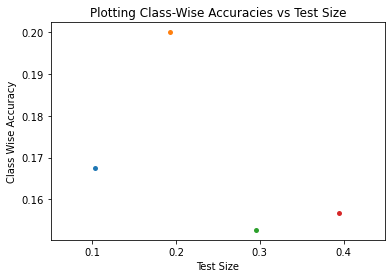

In [37]:
def visualize_class_wise_accuracy():
    Y = [classwise_accuracy1, classwise_accuracy2, classwise_accuracy3, classwise_accuracy4]
    X = [0.1, 0.2, 0.3, 0.4]

    graph = sns.stripplot(X, Y)
    graph.set(xlabel ='Test Size', ylabel ='Class Wise Accuracy')
    plt.title('Plotting Class-Wise Accuracies vs Test Size')
    plt.show()

visualize_class_wise_accuracy()

# Visualising Test Size vs Accuracy of Model For Each Test Size

C:\Users\MOHD SUFYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


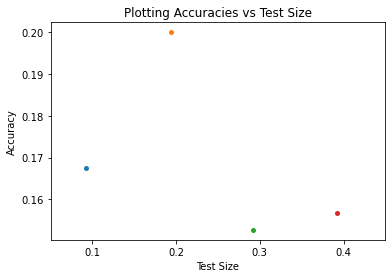

In [38]:
def visualize_accuracy():
    Y = [accuracy_90_10, accuracy_80_20, accuracy_70_30, accuracy_60_40]
    X = [0.1, 0.2, 0.3, 0.4]
    
    graph = sns.stripplot(X, Y)
    graph.set(xlabel ='Test Size', ylabel ='Accuracy')
    plt.title('Plotting Accuracies vs Test Size')
    plt.show()

visualize_accuracy()

In [39]:
# import io
# from google.colab import files
# uploaded = files.upload()
# data = pd.read_csv(io.BytesIO(uploaded['roo_data.csv']))
# data.head()